# 95-851 Fall 2018 - Making Products Count: Data Science for Product Management 

## Homework 1 Calculating Customer Lifetime Value(CLF)

Jie Lou (AndrewID: jlou1)

Due 9/5/2018

**Background: Customer Lifetime Value**

* It is a prediction of the net profit attributed to the entire future relationship with a customer
* Also defined as the dollar value of a customer relationship based on the projected future cash flows from the customer relationship
* Represents an upper limit on spending to acquire new customers

## Step 1. Understand the dataset

### Load Dataset

In [85]:
import pandas as pd
customer = pd.read_csv('HW1 clv_transactions-1.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 4 columns):
TransactionID      4186 non-null int64
TransactionDate    4186 non-null object
CustomerID         4186 non-null int64
Amount             4186 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 130.9+ KB


In [86]:
#Show the first 5 rows
customer.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94


### Convert Date column to datetime in Pandas

It is more convenient to handle datetime object in Pandas

In [87]:
#convert cutomer transactiondate type
customer['TransactionDate'] = pd.to_datetime(customer['TransactionDate'])

In [88]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 4 columns):
TransactionID      4186 non-null int64
TransactionDate    4186 non-null datetime64[ns]
CustomerID         4186 non-null int64
Amount             4186 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 130.9 KB


In [89]:
customer.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,2012-09-04,1,20.26
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94


Now, the format of date has changed. The dataset is ready for exploring.

### Question 1.1 Are there any missing values in the dataset?

A: No.

In [90]:
customer.isna().sum()

TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64

### Question 1.2 What is the range of dates in the dataset?

A: 1/4/2010 to 12/31/2015

In [91]:
customer.TransactionDate.max()

Timestamp('2015-12-31 00:00:00')

In [92]:
customer.TransactionDate.min()

Timestamp('2010-01-04 00:00:00')

### Question 1.3 How many unique customers are there in the dataset?

A:1000

In [93]:
len(customer.CustomerID.unique())

1000

### Question 1.4 Profile the data to give the standard descriptive statistics for the Amount field. What is the min,max,variance, and standard deviations?

A: minimum is -1 (could be outliers here), maximum is 2033, variance is 1499.54. standard deviations are 38.724. All in US Dollars.

In [94]:
#get descriptive statistics
customer.Amount.describe()

count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64

In [95]:
## Calculate Variance
customer.Amount.describe()['std']**2

1499.5411107517464

### Question 1.5 Do transaction amounts in general increase over time (perhaps due to inflation?)

A: Yes. Sum up all the transaction amounts every year. There is a slight decrease in 2013, but all the other years are observed a increase.

In [96]:
# Get the sum of transaction amount by year
customer.groupby(customer['TransactionDate'].dt.year).Amount.sum().sort_index()

TransactionDate
2010    2259.67
2011    4596.57
2012    7392.82
2013    6938.84
2014    8174.42
2015    8429.23
Name: Amount, dtype: float64

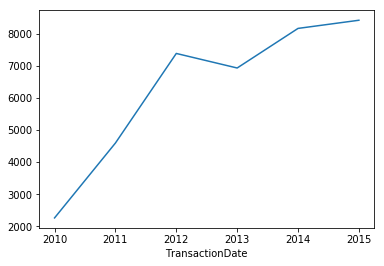

In [97]:
customer.groupby(customer['TransactionDate'].dt.year).Amount.sum().sort_index().plot()

## Step 2. Explore the dataset

### Question 2.1 Are there any outliers?

A: Yes. As we found before, there are two transctions with negative amounts. It could be caused by bad entries. Moreover, from the histogram and boxplot, we observed several extremely large transaction amounts in the dataset. From the descriptive statistics, we have known that 75% quantile of amount is around 11 but the max is above 2000. The amount above 1000 (3 records) can be treated as outliers.

From closer investigation, there were 9 customers whose transaction amount exceeded 30. Potentially, these records can also be treated as outliers. However, it is hard to say if the large amount is useless because there is a chance in the future the similar transaction happen again. 

In [98]:
# Select our transaction with negative amount
customer[customer.Amount<=0]

,TransactionID,TransactionDate,CustomerID,Amount
49,50,2012-05-12,13,-1.0
3326,3327,2014-01-16,811,-1.0


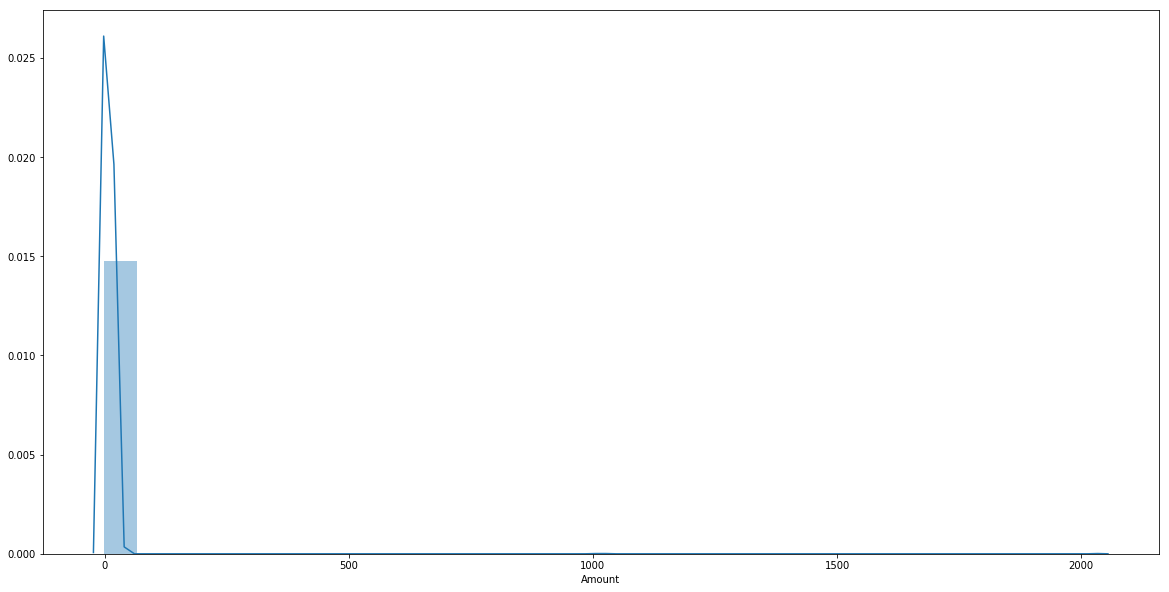

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.distplot(customer.Amount,bins=30)

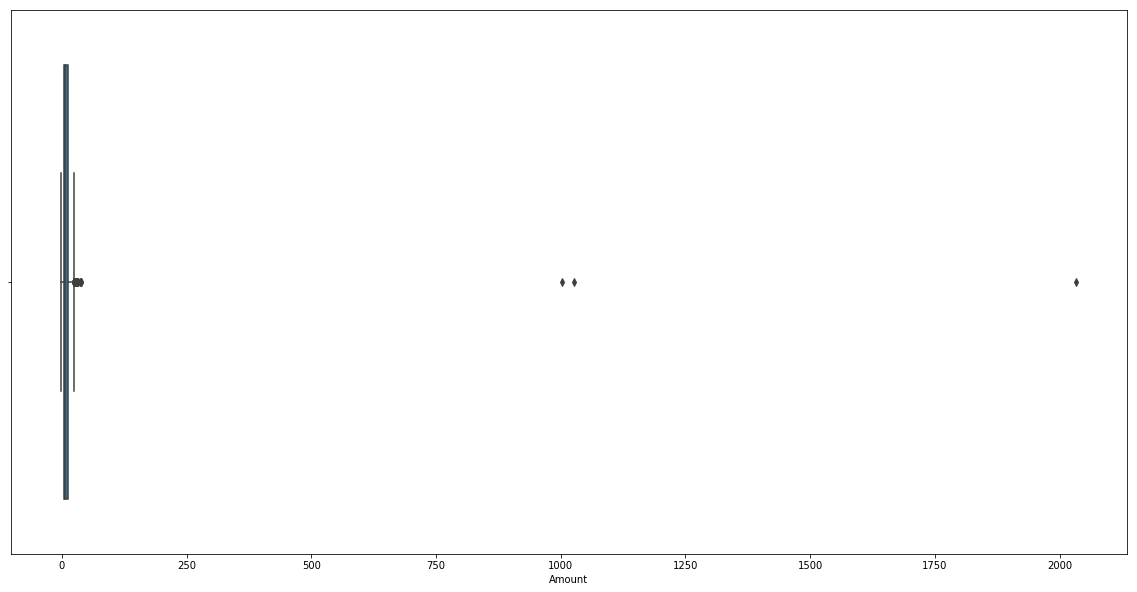

In [100]:
#Boxlot
plt.figure(figsize=(20,10))
sns.boxplot(customer.Amount)

In [101]:
customer[customer.Amount>30]

,TransactionID,TransactionDate,CustomerID,Amount
23,24,2011-10-07,7,1003.00
54,55,2015-01-29,13,37.27
211,212,2014-05-14,54,1027.00
263,264,2012-06-21,69,38.29
418,419,2013-12-31,100,30.31
585,586,2013-03-16,145,30.43
2273,2274,2013-04-13,573,32.81
2490,2491,2011-07-13,632,36.94
2644,2645,2011-05-16,663,31.40
2760,2761,2013-08-31,691,38.35


### Question 2.2 If so how would you treat them?

A: Remove three records with amount above 1000 and two negative amounts from the datasets. Afterwards, the histogram and boxplot seem reasonable. We kept the transaction over 25 because it may be the case in the future. 

In [102]:
#customer_new is the new dataset without outliers
customer_new = customer[(customer.Amount<1000)&(customer.Amount>0)]

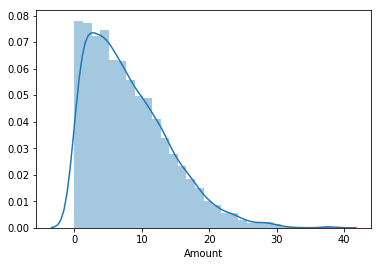

In [103]:
sns.distplot(customer_new.Amount,bins=30)

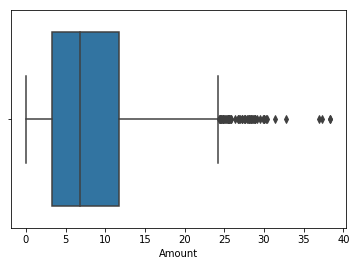

In [104]:
sns.boxplot(customer_new.Amount)

## Step 3. Determine origin year of customers

In [105]:
customer_new.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,2012-09-04,1,20.26
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94


In [106]:
# Find the customer's first transaction date and assign to group
#group = customer_new.groupby('CustomerID').TransactionDate.value_counts().groupby(level=[0]).apply(lambda x:min(x))
# reset index
#group.index = group.index.set_names(['CustomerID', 'index','Date'])

# Get the earliest year each customer have made transactions, stored in group dataframe
group = customer_new.groupby('CustomerID').TransactionDate.unique().apply(min).reset_index()


In [107]:
group.head()

,CustomerID,TransactionDate
0,1,2012-09-04
1,2,2012-05-15
2,3,2012-11-26
3,4,2015-07-07
4,5,2015-01-24


In [108]:
# extract columns what we want
#group = pd.DataFrame(group).reset_index()[['CustomerID','Date']]

In [109]:
# extract years from the dataframe
group['Group'] = group.TransactionDate.dt.year

In [110]:
# Drop date information because we only care the year
group.drop('TransactionDate',axis=1,inplace=True)

In [111]:
group.head(10)

,CustomerID,Group
0,1,2012
1,2,2012
2,3,2012
3,4,2015
4,5,2015
5,6,2013
6,7,2012
7,8,2012
8,9,2010
9,10,2010


**Now, the group dataframe is what we want**

## Step 4. Calculate cumulative transaction amounts

In [112]:
# Merge customer_new and group so that each custoemr has its group info
transaction = pd.merge(customer_new,
                       group,
                       on = 'CustomerID')

In [113]:
# extract year of each transation
transaction['year'] = transaction.TransactionDate.dt.year

In [114]:
# pre is a dataframe grouped by group and year(transaction) and each transaction age
pre=transaction.groupby(['Group','year']).Amount.sum().groupby(level=[0]).cumsum().reset_index()
pre['Origin']=12*(pre['year']-pre['Group']+1)
#Amount_cmltv=pd.DataFrame(transaction.groupby(['Group','year']).Amount.sum().groupby(level=[0]).cumsum().unstack().to_records())

In [115]:
pre.head()

,Group,year,Amount,Origin
0,2010,2010,2259.67,12
1,2010,2011,3614.78,24
2,2010,2012,5274.81,36
3,2010,2013,6632.37,48
4,2010,2014,7930.69,60


In [116]:
# Conver the df above to pivot table we want using crosstab function
Amount_cmltv=pd.crosstab(pre.Group,pre.Origin,values=pre.Amount,aggfunc=lambda x:x)

In [117]:
# set the index as we want
Amount_cmltv.index=['2010-01-01 - 2010-12-31',
                      '2011-01-01 - 2011-12-31',
                      '2012-01-01 - 2012-12-31',
                      '2013-01-01 - 2013-12-31',
                      '2014-01-01 - 2014-12-31',
                      '2015-01-01 - 2015-12-31',]

#Amount_cmltv.columns = ['Origin', '12','24','36','48','60','72']


In [118]:
Amount_cmltv

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01 - 2011-12-31,2238.46,3757.90,5465.99,6703.11,7862.24,NaN
2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,NaN,NaN
2013-01-01 - 2013-12-31,2179.85,3609.81,5227.75,NaN,NaN,NaN
2014-01-01 - 2014-12-31,1830.85,3262.05,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,1912.17,NaN,NaN,NaN,NaN,NaN


## Step 5. Calculate cumulative transaction amounts

Similarly above, just change sum() to count() and delete cumsum() function

In [119]:
# Copy the df since they have the same structure
newcust_cmltv=Amount_cmltv.copy()

**Get # new Customers for each year**

In [120]:
#get # new customers for each year
newcust=group.groupby('Group').CustomerID.count()
newcust

Group
2010    172
2011    170
2012    163
2013    180
2014    155
2015    160
Name: CustomerID, dtype: int64

**newcustomer table has the same structure with amount table instead of numbers**

In [121]:
import numpy as np

for i in range(newcust_cmltv.shape[0]):
    newcust_cmltv.iloc [i,]=[newcust.iloc[i]]*(6-i)+[np.NaN]*i

In [122]:
newcust_cmltv

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,172.0,172.0,172.0,172.0,172.0,172.0
2011-01-01 - 2011-12-31,170.0,170.0,170.0,170.0,170.0,NaN
2012-01-01 - 2012-12-31,163.0,163.0,163.0,163.0,NaN,NaN
2013-01-01 - 2013-12-31,180.0,180.0,180.0,NaN,NaN,NaN
2014-01-01 - 2014-12-31,155.0,155.0,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,160.0,NaN,NaN,NaN,NaN,NaN


## Step 6. Historic CLV

In [123]:
H_CLV=Amount_cmltv/newcust_cmltv

In [124]:
H_CLV

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,13.137616,21.016163,30.667500,38.560291,46.108663,52.119128
2011-01-01 - 2011-12-31,13.167412,22.105294,32.152882,39.430059,46.248471,NaN
2012-01-01 - 2012-12-31,13.382515,23.771104,32.066626,39.888650,NaN,NaN
2013-01-01 - 2013-12-31,12.110278,20.054500,29.043056,NaN,NaN,NaN
2014-01-01 - 2014-12-31,11.811935,21.045484,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,11.951062,NaN,NaN,NaN,NaN,NaN


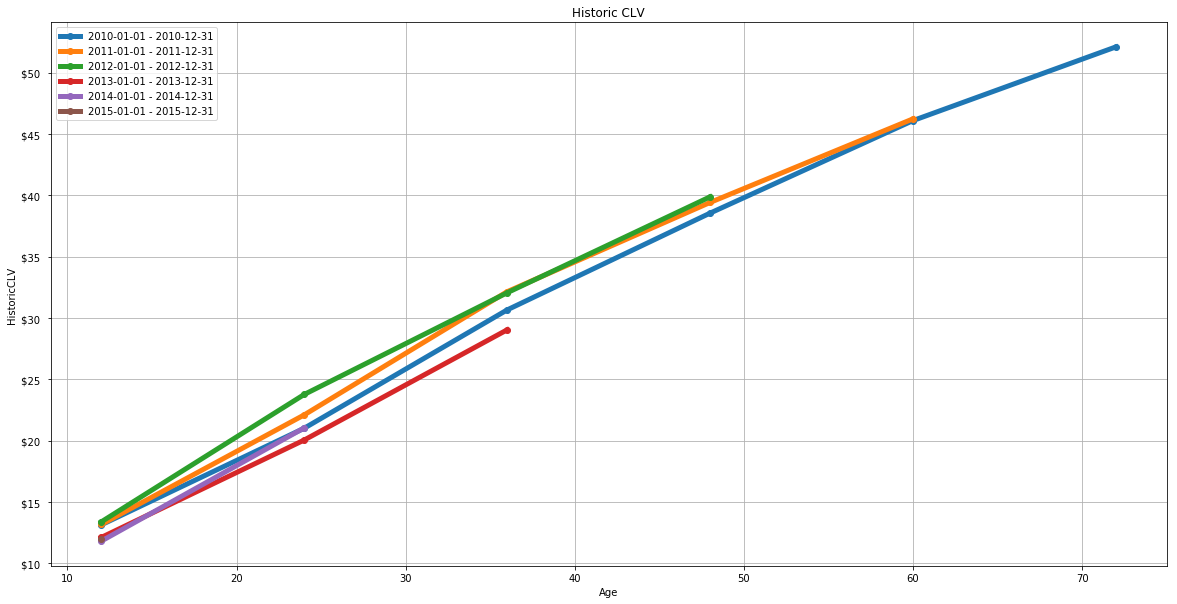

In [125]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(20,10))
plt.plot(H_CLV.T,linewidth=5,marker='o')
plt.title('Historic CLV')
plt.ylabel('HistoricCLV')
plt.xlabel('Age')
plt.legend(list(Amount_cmltv.index))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%d '))
plt.grid()

In [126]:
newcust_cmltv

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,172.0,172.0,172.0,172.0,172.0,172.0
2011-01-01 - 2011-12-31,170.0,170.0,170.0,170.0,170.0,NaN
2012-01-01 - 2012-12-31,163.0,163.0,163.0,163.0,NaN,NaN
2013-01-01 - 2013-12-31,180.0,180.0,180.0,NaN,NaN,NaN
2014-01-01 - 2014-12-31,155.0,155.0,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,160.0,NaN,NaN,NaN,NaN,NaN


In [127]:
H_CLV

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,13.137616,21.016163,30.667500,38.560291,46.108663,52.119128
2011-01-01 - 2011-12-31,13.167412,22.105294,32.152882,39.430059,46.248471,NaN
2012-01-01 - 2012-12-31,13.382515,23.771104,32.066626,39.888650,NaN,NaN
2013-01-01 - 2013-12-31,12.110278,20.054500,29.043056,NaN,NaN,NaN
2014-01-01 - 2014-12-31,11.811935,21.045484,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,11.951062,NaN,NaN,NaN,NaN,NaN


In [128]:
newcust_cmltv.fillna(0)*H_CLV.fillna(0)

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01 - 2011-12-31,2238.46,3757.90,5465.99,6703.11,7862.24,0.00
2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,0.00,0.00
2013-01-01 - 2013-12-31,2179.85,3609.81,5227.75,0.00,0.00,0.00
2014-01-01 - 2014-12-31,1830.85,3262.05,0.00,0.00,0.00,0.00
2015-01-01 - 2015-12-31,1912.17,0.00,0.00,0.00,0.00,0.00


**volume-weighted average of the Historic CLV for each group at each Age**

In [129]:
newcust_cmltv.fillna(0).sum()

Origin
12    1000.0
24     840.0
36     685.0
48     505.0
60     342.0
72     172.0
dtype: float64

In [130]:
# Weighted average: sum(H_CLV*newcust_cmltv)/sum(newcust_cmltv)
singleCLV=pd.DataFrame(np.sum(newcust_cmltv.fillna(0)*H_CLV.fillna(0))/np.sum(newcust_cmltv)).reset_index()
singleCLV.columns= ['Age','HistoricCLV']

In [131]:
singleCLV

,Age,HistoricCLV
0,12,12.602350
1,24,21.570512
2,36,30.942204
3,48,39.281842
4,60,46.178158
5,72,52.119128


## Step 7. Interpreting your results

Interpret the historic CLV and briefly answer the following question:
- How much have customers acquired in 2011 spent to date?
- Do each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?

A: 
- Customers acquired in 2011 spent $46.25 to date.
- Each group of customers exhibit similar patterns of spending because their CLV plot is very close. This business may not encourage customer loyalty. Perhaps, the business involves the must-needs for people so that the spending of each customer group is similar no matter how long the customer stays. Considering the transaction is almost lower than thirty dollars, it can be local gas station, snack shop, ice-cream shop.


**THE END**

2018/9/5